# **PREDICCIÓN DE INCUMPLIMIENTOS DE PAGO EDA-ML**

## **INTRODUCCIÓN**
*Las compañias del sectot financiero, ya sean estas entidades gubernamentales o privadas que realizan prestámos financieros, buscan poder reducir los impagos de los prestamos brindados y asegurar que estos sean pagados dentro de los plazos estipulados, pero, realmente ¿Se puede predecir quienes dejaran de pagar sus prestamos? y la respuesta, es: Sí. Ya que muchas empresas utilizan modelos de  Machine Learning (Aprendizaje Automatico) o Deep Learning (Aprendizaje Profundo) y en base a data historica de clientes se puede predecir quienes presentan mayor riesgo de incumplimiento de un prestamo.*

## **ACERCA DEL DATASET** 
*Este conjunto de datos proviene del "Desafío de predicción de morosidad de préstamos" de Coursera extraido de la plataforma Kaggle (url del Dataset:https://www.kaggle.com/datasets/nikhil1e9/loan-default/data)y en esta oportunidad evaluareamos diferente modelos de Machine Learning para poder predecir mediante una clasificacioón, que clientes presentan mayor riesgo de impago de un prestamo.*

## **OBJETIVOS DEL PROYECTO**
* *EL objetivo principal es construir un modelo de Machine Learnig de clasificación binaria el cual ayude a las entidades financieras en clasificar a un posible cliente que presente incumpliento de pago de su prestamo.*

### **TABLA DE CONTENIDOS**

**LIBRERIAS A USAR EN EL EDA**

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

**EXTRACCIÓN DE LA DATA**

In [42]:
df=pd.read_csv(r"E:\FONDO TALENTO DIGITAL\Portafolio_GITHUB\Fraude de pagos\Loan-Default-Prediction-Dataset\Loan_default.csv")

**EXPLORATORY DATA ANALISIS**

In [43]:
df.head(3)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


In [44]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [45]:
df.shape
print(f"Nuestro Dataset contiene: {df.shape[0]} filas")
print(f"Nuestro Dataset contiene: {df.shape[1]} columnas")

Nuestro Dataset contiene: 255347 filas
Nuestro Dataset contiene: 18 columnas


In [46]:
df.columns
print(f"Las columnas del Dataset son: [{df.columns}]")

Las columnas del Dataset son: [Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')]


**DESCRIPCIÓN DE LAS COLUMNAS**
* 0 - **LoanID** : Identificador unico para cada prestamo
* 1 - **Age**:Edad 
* 2 - **Income** : Ingresos anuales del prestamista 
* 3 - **LoanAmount** : Cantidad de dinero prestado
* 4 - **CreditScore** : El puntaje crediticio del prestatario
* 5 - **MonthsEmployed** : Numero de meses del prestatario ha estado empleado
* 6 - **NumCreditLines** : Numero de cantidad de lienas de credito
* 7 - **InterestRate** : El interes impuesto al prestatario
* 8 - **LoanTerm** : La duracion del prestamo en meses
* 9 - **DTIRatio** : la relación deuda-ingresos, que indica la deuda del prestatario en comparación con sus ingresos
* 10 - **Education** : el nivel más alto de educación alcanzado por el prestatario
* 11 - **EmploymentType** : el tipo de estado laboral del prestatario
* 12 - **MaritalStatus** : el estado civil del prestatario
* 13 - **HasMortgage** : si el prestatario tiene una hipoteca
* 14 - **HasDependents** : si el préstamo tiene dependientes
* 15 - **LoanPurpose** : el propósito del préstamo
* 16 - **HasCoSigner** : si el préstamo tiene un co-firmante
* 17 - **Default (Target)** : La variable objetivo binaria que indica si el préstamo incumplió.

In [47]:
df.duplicated().sum()

0

In [48]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

**Conclusion inicial del analis exploratorio**
*Observamos que nuestro Dataset contiene 255347 filas unicas sin valores duplicados y que no existen valores nulos dentro de las columnas del Dataset, por otro lado observamos que tenemos caracteristicas unicamente del tipo Object, Int y Float, tambien que nuestra variable objetivo o target es **Default*** 

**ANALISIS DE VARIABLES CATEGORICAS**

In [50]:
cat_columns =df.select_dtypes(exclude=["int64","float64"])
cat_columns.columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [51]:
for cat_col in cat_columns:
    print(f"Conteo de valores unicos para la columna'{cat_col}': ")
    print(df[cat_col].value_counts())
    print("."*30)

Conteo de valores unicos para la columna'LoanID': 
LoanID
I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: count, Length: 255347, dtype: int64
..............................
Conteo de valores unicos para la columna'Education': 
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
..............................
Conteo de valores unicos para la columna'EmploymentType': 
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
..............................
Conteo de valores unicos para la columna'MaritalStatus': 
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
..............................
Conteo de valores unicos para la columna'HasMortgage': 
HasMortgage
Yes    127677


**VISUALIZACION DE LAS VARIABLES CATEGORICAS**

In [52]:
cat_columns.head()

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,I38PQUQS96,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,HPSK72WA7R,Master's,Full-time,Married,No,No,Other,Yes
2,C1OZ6DPJ8Y,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,V2KKSFM3UN,High School,Full-time,Married,No,No,Business,No
4,EY08JDHTZP,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [53]:
cat_columns.columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29440\3017384783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Education', data=cat_columns,palette=colores)


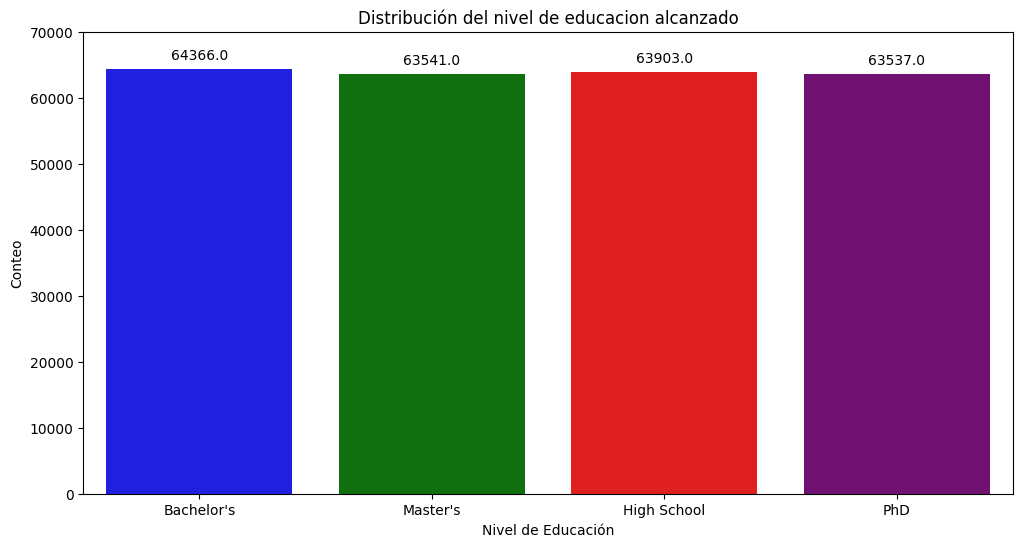

In [95]:

plt.figure(figsize=(12,6))
colores=['blue', 'green', 'red', 'purple']
sns.countplot(x ='Education', data=cat_columns,palette=colores)
plt.title('Distribución del nivel de educacion alcanzado')
plt.xlabel("Nivel de Educación")
plt.ylabel("Conteo")
plt.yticks(range(0,80000,10000))
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), 
                       textcoords='offset points')
plt.show()

**INFERENCIA** : En base al grafico superior inferimos que la poblacion tiene 4 grupos de personas distribuidas por el nivel de estudio alcanzados, los cuales son: Bachelor´s, Master´s, High School, PhD. Los cuales se encuentran distribuidos de forma casi uniforme no presentando una gran diferencia en la cantidad de cada grupo. Por otro lado el grupo de personas que tienen educacion de Bachelor´s es el que presenta ligeramente mayor cantidad en comparación a los demas, por otro lado observando el Dataset no presenta sesgo hacia una categoria en especifico, asi mismo tambien concluimos que los clientes que solicitan los prestamos superaron el nivel de educación desde High School hacia adelante, y tambien puedo inferir que hay menor desigualdad en el acceso a la educación en los clientes de nuestro Dataset.

In [96]:
cat_columns['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [97]:
cat_columns['LoanPurpose'].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

In [99]:
edu_proposito = cat_columns.groupby("Education")[["LoanPurpose"]].value_counts().reset_index()
edu_proposito


,Education,LoanPurpose,count
0,Bachelor's,Education,13006
1,Bachelor's,Business,12973
2,Bachelor's,Other,12912
3,Bachelor's,Home,12903
4,Bachelor's,Auto,12572
5,High School,Home,12854
6,High School,Business,12801
7,High School,Other,12777
8,High School,Auto,12748
9,High School,Education,12723
